In [94]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Читання файлу
df = pd.read_csv('2017_jun_final.csv')

In [4]:
# Перегляд перших 5 рядків таблиці
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [5]:
# Розмір таблиці
print(df.shape)

(8704, 25)


In [6]:
# Типи стовпців
print(df.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [7]:
# Частка пропусків в кожному стовпці
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [14]:
# Видалення стовпців з пропусками, крім "Мова програмування"
df_cleaned = df.dropna(axis=1, subset=[2], how='all')

# Перевірка частки пропусків після видалення стовпців
missing_data_cleaned = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print(missing_data_cleaned)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                            

In [20]:
# Знаходимо всі стовпці з пропусками
columns_with_missing = df.columns[df.isnull().sum() > 0]

# Видаляємо стовпці з пропусками, крім "Мова програмування"
columns_to_drop = [col for col in columns_with_missing if col != 'Мова програмування']
df_cleaned = df.drop(columns=columns_to_drop)

# Перевірка частки пропусків після видалення стовпців
missing_data_cleaned = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print(missing_data_cleaned)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


In [21]:
# Видалення всіх рядків з пропусками
df_dropped = df.dropna()

# Розмір таблиці після видалення рядків
print(df_dropped.shape)

(0, 25)


In [24]:
# Фільтрація рядків, де мова програмування - Python
python_data = df[df['Мова програмування'] == 'Python']

# Розмір таблиці python_data
print(python_data.shape)
#print(python_data)

(207, 25)


In [33]:
# Групування за стовпцем "Посада"
grouped_by_position = python_data.groupby('Посада')

In [34]:
# Агреація мінімального та максимального значення зарплати по групах за посадами
salary_agg = grouped_by_position['Зарплата на місяць'].agg(['min', 'max'])
print(salary_agg)

                           min   max
Посада                              
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


In [54]:
# Створення функції для заповнення середньої зарплати
def fill_avg_salary(row):
    return (row['min'] + row['max']) / 2

# Використовуємо apply для створення нового стовпця "avg"
salary_agg['avg'] = salary_agg.apply(fill_avg_salary, axis=1)

# Переглядаємо результат
print(salary_agg)

                           min   max     avg
Посада                                      
Junior Software Engineer   100  1250   675.0
Senior Software Engineer  1300  9200  5250.0
Software Engineer          500  5400  2950.0
System Architect          3000  5000  4000.0
Technical Lead            1425  6200  3812.5


In [55]:
# Описова статистика для стовпця "avg"
print(salary_agg['avg'].describe())

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [60]:
# Збереження таблиці в CSV файл
salary_agg.to_csv('cleaned_2017_jun_final.csv', index=True, encoding='utf-8')

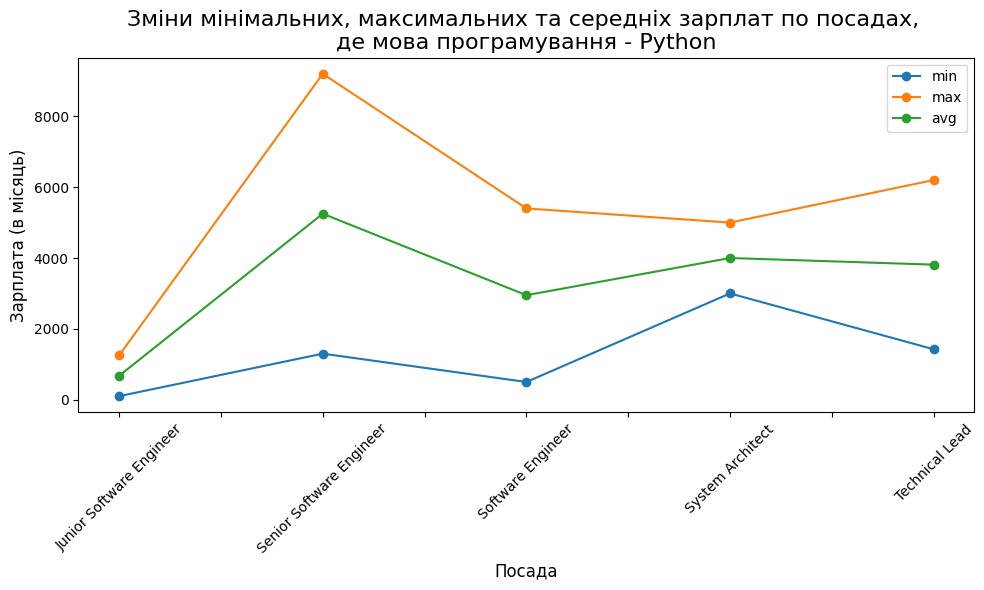

In [79]:
salary_agg[['min', 'max', 'avg']].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Зміни мінімальних, максимальних та середніх зарплат по посадах, \nде мова програмування - Python', fontsize=16)
plt.xlabel('Посада', fontsize=12)
plt.ylabel('Зарплата (в місяць)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показуємо графік
plt.show()

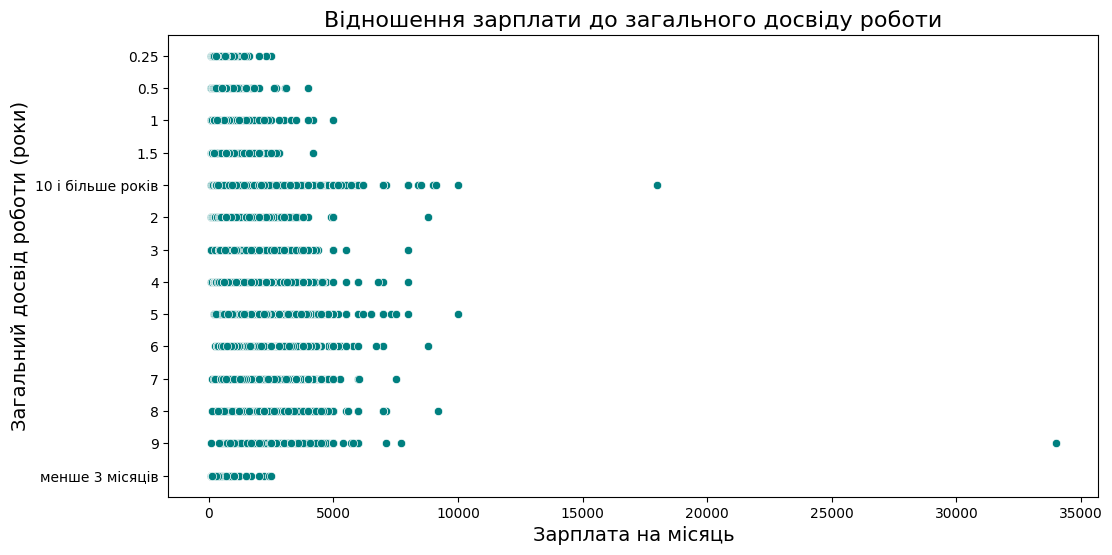

In [93]:
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by='Загальний досвід роботи', ascending=True)
sns.scatterplot(x='Зарплата на місяць', y='Загальний досвід роботи', data=df_sorted, color='teal')
plt.title('Відношення зарплати до загального досвіду роботи', fontsize=16)
plt.xlabel('Зарплата на місяць', fontsize=14)
plt.ylabel('Загальний досвід роботи (роки)', fontsize=14)
plt.show()

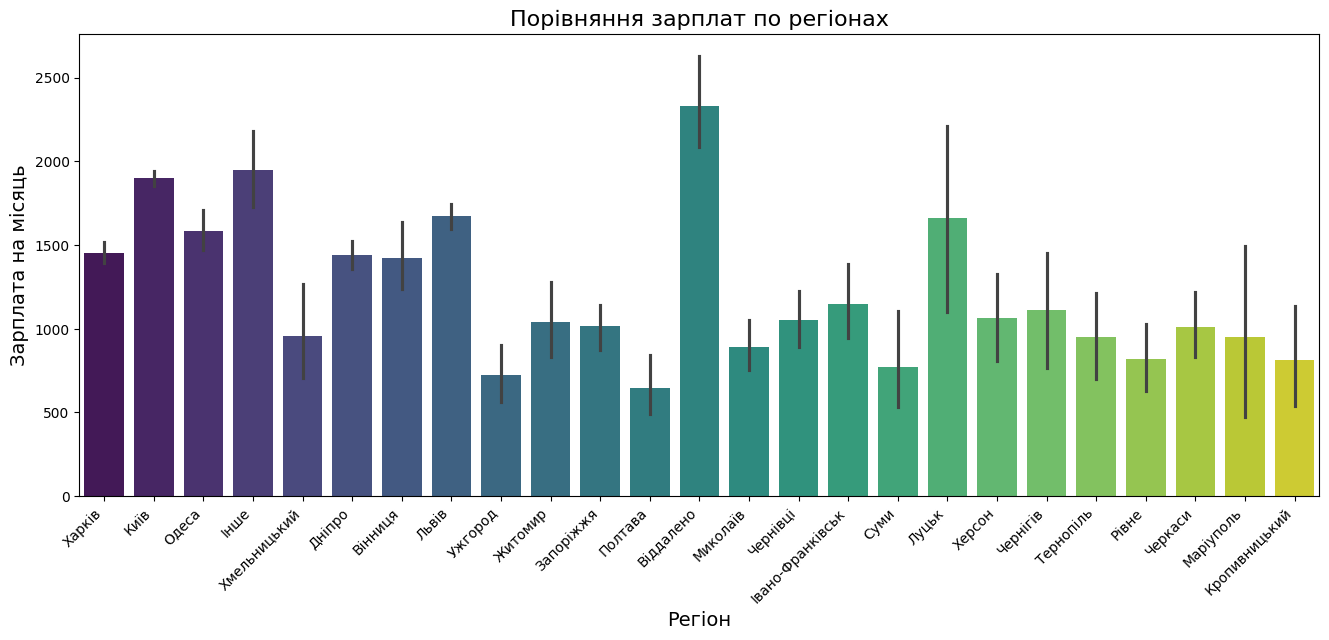

In [90]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Місто', y='Зарплата на місяць', data=df, palette='viridis', hue='Місто', legend=False)

# Оформлення графіка
plt.title('Порівняння зарплат по регіонах', fontsize=16)
plt.xlabel('Регіон', fontsize=14)
plt.ylabel('Зарплата на місяць', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Поворот підписів по осі X для кращої читаємості
plt.show()